In [1]:
import pandas as pd
import os
os.chdir("C:/Users/yizhe/Desktop/Crime Dataset/")
from IPython.display import display
pd.options.display.max_columns = None
import utm
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='tomqu', api_key='tNJH2ErQNHGfuFDMm4ss')

In [2]:
df = pd.read_csv("crime.csv")
df['HOUR'].fillna(99, inplace = True)
df['MINUTE'].fillna(99, inplace = True)
df['DATE'] = pd.to_datetime({'year':df['YEAR'], 'month':df['MONTH'], 'day':df['DAY']})
df['DAY_OF_WEEK'] = df['DATE'].dt.dayofweek + 1
def category(crime_type):
    if 'Collision' in crime_type:
        if "Injury" in crime_type:
            return 'Vehicle Collision (with Injury)'
        else:
            return 'Vehicle Collision (with Fatality)'
    else:
        return crime_type
df['TYPE'] = df['TYPE'].apply(category)
net_df = df.groupby(["NEIGHBOURHOOD","TYPE"]).aggregate({"TYPE":'count'})
net_df.columns = ['TYPE_COUNTS']
net_df.reset_index(inplace=True)

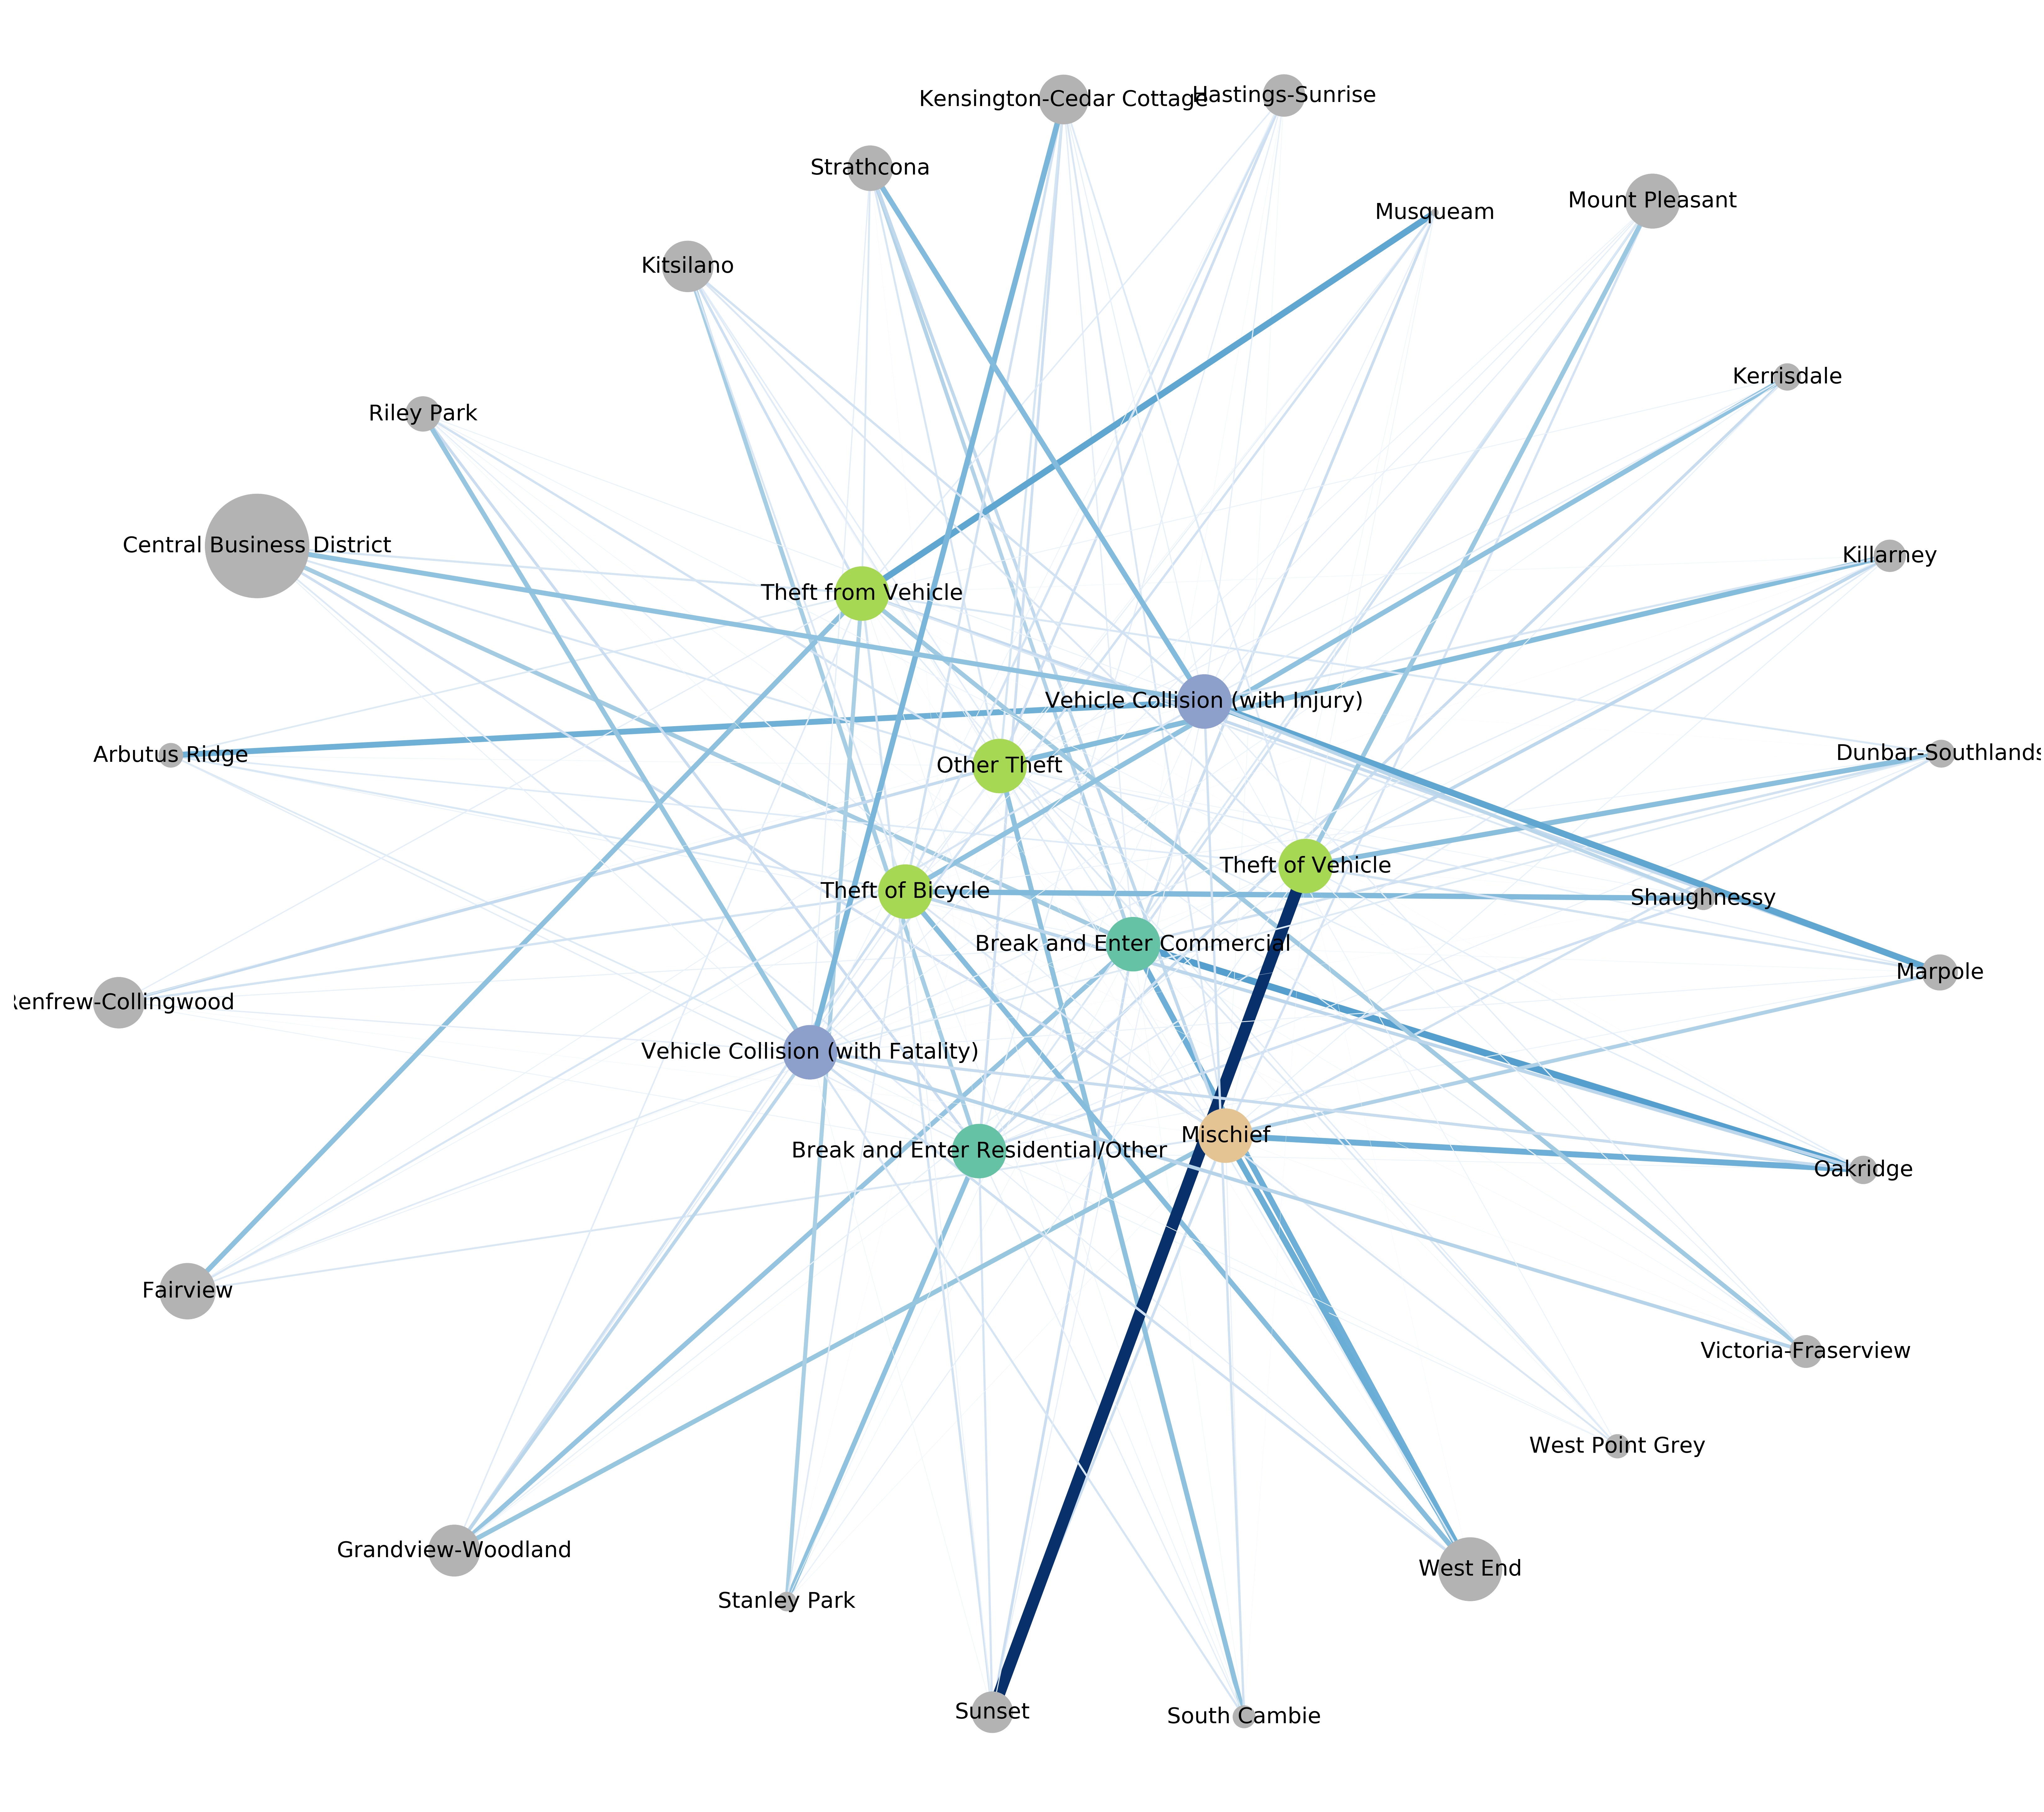

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go

import networkx as nx
neighbourhood = net_df['NEIGHBOURHOOD']
crime_type = net_df['TYPE']
type_counts = net_df['TYPE_COUNTS']
netdraw_df = pd.DataFrame({ 'from':crime_type, 'to':neighbourhood, 'value':type_counts})
netdraw_df['from'].unique()

G=nx.from_pandas_edgelist(netdraw_df, 'from', 'to',create_using=nx.Graph() )

ID = list(G.nodes())
Category = ['Crime','Region','Crime','Mischief','Crime_theft','Crime_theft','Crime_theft','Crime_theft','Crime_collision',
            'Crime_collision','Region','Region','Region','Region','Region','Region','Region','Region','Region','Region',
            'Region','Region','Region','Region','Region','Region','Region','Region','Region','Region','Region','Region','Region']
carac = pd.DataFrame({ 'ID':ID, 'myvalue':Category })
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
carac['myvalue']=pd.Categorical(carac['myvalue'])

sum_val = netdraw_df.groupby("to").sum()
sum_val.reset_index(inplace=True)
sum_val.columns = ['to','sum']

netdraw_df = netdraw_df.merge(sum_val, how='left', on='to')
netdraw_df['percentage'] = netdraw_df['value']/netdraw_df['sum']
netdraw_df.head()

Node_size = []
for item in list(G.nodes()):
    if item not in list(sum_val['to']):
        Node_size.append(30000)
    else:
        value = int(sum_val[sum_val['to']==item]['sum'].values)
        Node_size.append(value)
        
plt.figure(figsize=(90,80)) 

nx.draw(G, with_labels=True, node_size=Node_size, font_size=70, pos=nx.fruchterman_reingold_layout(G,k=2.4),
        node_color=carac['myvalue'].cat.codes, cmap=plt.cm.Set2,  width=netdraw_df['percentage']*50,
        edge_color=netdraw_df['percentage']*60, edge_cmap=plt.cm.Blues)
plt.show()
# Outer grey circle nodes represent the neighbourhood regions in Vancouver. The size of these nodes represent the total number of
# crimes occured here
# Inner circles represent various crime types. Similar crime types are grouped into the same colors
# The edge width and color gradient represent the percentage weights of each crime types occurred in that region. The thicker
# the edge width or the darker the edge color, the more weight that type of cirme has in that region

In [4]:
df_day = df[df['YEAR'] > 2013]
df_day = df_day[df_day['TYPE'].str.contains("Theft of Vehicle")]

def color_assign(x):
    if "Theft of Vehicle" in x:
        return "darkgreen"
    elif "Theft" in x:
        return "green"
    elif "with Injury" in x:
        return "blue"
    elif "with Fatality" in x:
        return "black"
    elif "Residential" in x:
        return "darkorange"
    elif "Commercial" in x:
        return "red"
    else:
        return "pink"
df_day['Color'] = df_day['TYPE'].apply(color_assign)

import plotly.plotly as py
import plotly.graph_objs as go

mapbox_access_token = 'pk.eyJ1IjoicXl6cXl6MSIsImEiOiJjanNodXdsMG8wcnAxNDlxZzhiazE3cjk2In0.8_FK2gmApimPtbIbKYcIlQ'

data = [
    go.Scattermapbox(
        lat=df_day['Latitude'],
        lon=df_day['Longitude'],
        mode='markers',
        marker=dict(
            size=10,
            color=df_day['Color'],
            opacity=0.2
        ),
        text=df_day['TYPE'],
        name='Vehicle Collision'
    )
]

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=49,
            lon=-122.5
        ),
        pitch=0,
        zoom=8
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox')



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~tomqu/0 or inside your plot.ly account where it is named 'Multiple Mapbox'


In [5]:
df_day = df.query("YEAR==2016 and MONTH==12 and DAY==25")

def color_assign(x):
    if "Theft of Vehicle" in x:
        return "lawngreen"
    elif "Theft" in x:
        return "green"
    elif "with Injury" in x:
        return "blue"
    elif "with Fatality" in x:
        return "black"
    elif "Residential" in x:
        return "darkorange"
    elif "Commercial" in x:
        return "red"
    else:
        return "pink"
df_day['Color'] = df_day['TYPE'].apply(color_assign)

df_day_mischief = df_day[df_day['TYPE']=='Mischief']
df_day_breakres = df_day[df_day['TYPE']=='Break and Enter Residential/Other']
df_day_breakcom = df_day[df_day['TYPE']=='Break and Enter Commercial']
df_day_othertheft = df_day[(df_day['TYPE']=='Other Theft') | (df_day['TYPE']=='Theft of Bicycle') | 
                           (df_day['TYPE']=='Theft from Vehicle')]
df_day_theftofveh = df_day[df_day['TYPE']=='Theft of Vehicle']

df_day_injury = df_day[df_day['TYPE']=='Vehicle Collision (with Injury)']

df_day['TYPE'].unique()

import plotly.plotly as py
import plotly.graph_objs as go

mapbox_access_token = 'pk.eyJ1IjoicXl6cXl6MSIsImEiOiJjanNodXdsMG8wcnAxNDlxZzhiazE3cjk2In0.8_FK2gmApimPtbIbKYcIlQ'



data1 = go.Scattermapbox(
        lat=df_day_mischief['Latitude'],
        lon=df_day_mischief['Longitude'],
        mode='markers',
        marker=dict(
            size=10,
            color=df_day_mischief['Color'],
        ),
        text=df_day_mischief['TYPE'],
        name='Mischief'
    )



data2 = go.Scattermapbox(
        lat=df_day_breakres['Latitude'],
        lon=df_day_breakres['Longitude'],
        mode='markers',
        marker=dict(
            size=10,
            color=df_day_breakres['Color'],
        ),
        text=df_day_breakres['TYPE'],
        name='Break and Enter Residential/Other'
    )



data3 = go.Scattermapbox(
        lat=df_day_breakcom['Latitude'],
        lon=df_day_breakcom['Longitude'],
        mode='markers',
        marker=dict(
            size=10,
            color=df_day_breakcom['Color'],
        ),
        text=df_day_breakcom['TYPE'],
        name='Break and Enter Commercial'
    )



data4 = go.Scattermapbox(
        lat=df_day_othertheft['Latitude'],
        lon=df_day_othertheft['Longitude'],
        mode='markers',
        marker=dict(
            size=10,
            color=df_day_othertheft['Color'],
        ),
        text=df_day_othertheft['TYPE'],
        name='Other Theft'
    )



data5 = go.Scattermapbox(
        lat=df_day_theftofveh['Latitude'],
        lon=df_day_theftofveh['Longitude'],
        mode='markers',
        marker=dict(
            size=10,
            color=df_day_theftofveh['Color'],
        ),
        text=df_day_theftofveh['TYPE'],
        name='Theft of Vehicle'
    )


    
data6 = go.Scattermapbox(
        lat=df_day_injury['Latitude'],
        lon=df_day_injury['Longitude'],
        mode='markers',
        marker=dict(
            size=10,
            color=df_day_injury['Color'],
        ),
        text=df_day_injury['TYPE'],
        name='Vehicle Collision (with Injury)'
    )


data = [data1, data2, data3, data4, data5, data6]

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=49,
            lon=-122.5
        ),
        pitch=0,
        zoom=8
    ),
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox')

C:\Users\yizhe\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~tomqu/0 or inside your plot.ly account where it is named 'Multiple Mapbox'


In [6]:
full_df = pd.read_csv("crime_csv_all_years.csv")
full_df = full_df[full_df['YEAR']!=2019]
full_df['DATE'] = pd.to_datetime({'year':full_df['YEAR'], 'month':full_df['MONTH'], 'day':full_df['DAY']})
full_df.head()

def categorize(x):
    if "Collision" in x:
        return "Vehicle Collision"
    elif "Theft of Vehicle" in x:
        return x
    elif "Theft" in x:
        return "Other Theft"
    else:
        return x
full_df['TYPE'] = full_df['TYPE'].apply(categorize)
full_df['TYPE'].unique()

time_df = full_df.sort_values(by=['DATE'])
time_df = time_df.groupby(["TYPE","DATE"]).aggregate({"NEIGHBOURHOOD":"count"})
time_df.columns=['Count']
time_df.reset_index(inplace=True)
time_df.head()

time_df = full_df.sort_values(by=['DATE'])
time_df = time_df.groupby(["TYPE","DATE"]).aggregate({"NEIGHBOURHOOD":"count"})
time_df.columns=['Count']
time_df.reset_index(inplace=True)
time_df = time_df[time_df['Count']<100]

import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd


trace_1 = go.Scatter(
                x=time_df[time_df['TYPE']=='Break and Enter Commercial'].DATE,
                y=time_df[time_df['TYPE']=='Break and Enter Commercial']['Count'],
                name = "Break and Enter Commercial",
                line = dict(color = 'lightblue'),
                opacity = 0.8)

trace_2 = go.Scatter(
                x=time_df[time_df['TYPE']=='Break and Enter Residential/Other'].DATE,
                y=time_df[time_df['TYPE']=='Break and Enter Residential/Other']['Count'],
                name = 'Break and Enter Residential/Other',
                line = dict(color = 'darkgrey'),
                opacity = 0.8)

trace_3 = go.Scatter(
                x=time_df[time_df['TYPE']=='Homicide'].DATE,
                y=time_df[time_df['TYPE']=='Homicide']['Count'],
                name = 'Homicide',
                line = dict(color = 'blue'),
                opacity = 0.8)

trace_4 = go.Scatter(
                x=time_df[time_df['TYPE']=='Theft of Vehicle'].DATE,
                y=time_df[time_df['TYPE']=='Theft of Vehicle']['Count'],
                name = 'Theft of Vehicle',
                line = dict(color = 'green'),
                opacity = 0.8)

trace_5 = go.Scatter(
                x=time_df[time_df['TYPE']=='Offence Against a Person'].DATE,
                y=time_df[time_df['TYPE']=='Offence Against a Person']['Count'],
                name = 'Offence Against a Person',
                line = dict(color = 'orange'),
                opacity = 0.8)

trace_6 = go.Scatter(
                x=time_df[time_df['TYPE']=='Other Theft'].DATE,
                y=time_df[time_df['TYPE']=='Other Theft']['Count'],
                name = 'Other Theft',
                line = dict(color = 'violet'),
                opacity = 0.8)

trace_7 = go.Scatter(
                x=time_df[time_df['TYPE']=='Mischief'].DATE,
                y=time_df[time_df['TYPE']=='Mischief']['Count'],
                name = 'Mischief',
                line = dict(color = 'pink'),
                opacity = 0.8)

trace_8 = go.Scatter(
                x=time_df[time_df['TYPE']=='Vehicle Collision'].DATE,
                y=time_df[time_df['TYPE']=='Vehicle Collision']['Count'],
                name = 'Vehicle Collision',
                line = dict(color = 'yellow'),
                opacity = 0.8)


data = [trace_1,trace_2, trace_3, trace_4, trace_5, trace_6, trace_7, trace_8]

layout = dict(
    title='Time Series with Rangeslider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Time Series with Rangeslider")

The draw time for this plot will be slow for clients without much RAM.


C:\Users\yizhe\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



In [7]:
full_df = pd.read_csv("crime_csv_all_years.csv")
full_df = full_df[full_df['YEAR']!=2019]
full_df['DATE'] = pd.to_datetime({'year':full_df['YEAR'], 'month':full_df['MONTH'], 'day':full_df['DAY']})
full_df.head()

def categorize(x):
    if "Collision" in x:
        return "Vehicle Collision"
    elif "Theft of Vehicle" in x:
        return x
    elif "Theft" in x:
        return "Other Theft"
    else:
        return x
full_df['TYPE'] = full_df['TYPE'].apply(categorize)
full_df.head()

time_df = full_df.groupby(["TYPE","YEAR","MONTH"]).aggregate({"NEIGHBOURHOOD":"count"})
time_df.columns=['Count']
time_df.reset_index(inplace=True)
time_df = time_df.assign(DATE=pd.to_datetime(time_df[['YEAR', 'MONTH']].assign(day=1)))
time_df.head()

import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd


trace_1 = go.Scatter(
                x=time_df[time_df['TYPE']=='Break and Enter Commercial'].DATE,
                y=time_df[time_df['TYPE']=='Break and Enter Commercial']['Count'],
                name = "Break and Enter Commercial",
                line = dict(color = 'lightblue'),
                opacity = 0.8)

trace_2 = go.Scatter(
                x=time_df[time_df['TYPE']=='Break and Enter Residential/Other'].DATE,
                y=time_df[time_df['TYPE']=='Break and Enter Residential/Other']['Count'],
                name = 'Break and Enter Residential/Other',
                line = dict(color = 'darkgrey'),
                opacity = 0.8)

trace_3 = go.Scatter(
                x=time_df[time_df['TYPE']=='Homicide'].DATE,
                y=time_df[time_df['TYPE']=='Homicide']['Count'],
                name = 'Homicide',
                line = dict(color = 'blue'),
                opacity = 0.8)

trace_4 = go.Scatter(
                x=time_df[time_df['TYPE']=='Theft of Vehicle'].DATE,
                y=time_df[time_df['TYPE']=='Theft of Vehicle']['Count'],
                name = 'Theft of Vehicle',
                line = dict(color = 'green'),
                opacity = 0.8)

trace_5 = go.Scatter(
                x=time_df[time_df['TYPE']=='Offence Against a Person'].DATE,
                y=time_df[time_df['TYPE']=='Offence Against a Person']['Count'],
                name = 'Offence Against a Person',
                line = dict(color = 'orange'),
                opacity = 0.8)

trace_6 = go.Scatter(
                x=time_df[time_df['TYPE']=='Other Theft'].DATE,
                y=time_df[time_df['TYPE']=='Other Theft']['Count'],
                name = 'Other Theft',
                line = dict(color = 'violet'),
                opacity = 0.8)

trace_7 = go.Scatter(
                x=time_df[time_df['TYPE']=='Mischief'].DATE,
                y=time_df[time_df['TYPE']=='Mischief']['Count'],
                name = 'Mischief',
                line = dict(color = 'pink'),
                opacity = 0.8)

trace_8 = go.Scatter(
                x=time_df[time_df['TYPE']=='Vehicle Collision'].DATE,
                y=time_df[time_df['TYPE']=='Vehicle Collision']['Count'],
                name = 'Vehicle Collision',
                line = dict(color = 'yellow'),
                opacity = 0.8)


data = [trace_1,trace_2, trace_3, trace_4, trace_5, trace_6, trace_7, trace_8]

layout = dict(
    title='Time Series with Rangeslider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Time Series with Rangeslider")